# A* Search Project Template

This notebook will help you implement and visualize A* search on a grid-based maze.

## Objectives:
- Load a 2D grid
- Implement A* search
- Visualize the explored path
- Compare performance with BFS for large maze, like size = thousands

In [85]:
# Do not change
# Generate a unique sizexsize maze with random obstacles, a start, and a goal
import random

def generate_maze(seed=None, size=10):
    if seed is not None:
        random.seed(seed)
    grid = [['.' for _ in range(size)] for _ in range(size)]
    num_walls = random.randint((int(size/1.8)**2), int((size/1.5)**2))                           #<--- number of wals
    for _ in range(num_walls):
        x, y = random.randint(0, size-1), random.randint(0, size-1)
        grid[x][y] = '#'
    
    # Place start and goal
    randomly = True
    if randomly:
        while True:
            sx, sy = random.randint(0, size-1), random.randint(0, size-1)
            gx, gy = random.randint(0, size-1), random.randint(0, size-1)
            if (sx != gx or sy != gy) and grid[sx][sy] == '.' and grid[gx][gy] == '.':
                grid[sx][sy] = 'S'
                grid[gx][gy] = 'G'
                break
    else:
        grid[0][0] = 'S'
        grid[size-1][size-1] = 'G'
    
    return grid


In [86]:
# no need to change
from collections import deque

def bfs(grid, start, goal):
    queue = deque()
    queue.append((start, [start]))  # (current_position, path_so_far)
    visited = set()

    while queue:
        current, path = queue.popleft()
        if current == goal:
            return path

        if current in visited:
            continue
        visited.add(current)

        x, y = current
        for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]):
                if grid[nx][ny] != '#' and (nx, ny) not in visited:
                    queue.append(((nx, ny), path + [(nx, ny)]))
    
    return None  # No path found

In [87]:
# A* search implementation
import heapq

# manhatan distance heuristic
def manhattanDistance(pointA, pointB):
    return abs(pointA[0] - pointB[0]) + abs(pointA[1] - pointB[1])

def astar(grid, start, goal):
    # your implementation

    # priority queue to stores nodes to explore like f, g, node, and parent
    openList = []
    heapq.heappush(openList, (0, 0, start, None))
    
    # Keep track of where we came from for each spot
    cameFrom = {}
    # shortest path we found to each spot
    gScores = {start: 0}
    # places we have already been
    closedSet = set()
    
    while openList:
        f, g, current, parent = heapq.heappop(openList)

        # skip if we have already been here
        if current in closedSet:
            continue
        cameFrom[current] = parent
        # If we reached the goal build the path again
        if current == goal:
            # reconstruct path
            path = []
            while current:
                path.append(current)
                current = cameFrom[current]
            path.reverse()
            return path

        closedSet.add(current)

        # looking at 4 neighbors  left, rightm, and up, down,
        neighbors = [
            (current[0]-1, current[1]), 
            (current[0]+1, current[1]),
            (current[0], current[1]-1),
            (current[0], current[1]+1)
        ]
        
        for neighbor in neighbors:
            r, c = neighbor
            # check if inside the grid and not a wall
            if (0 <= r < len(grid)) and (0 <= c < len(grid[0])) and grid[r][c] != '#' :
                newG = g + 1
                # if this the bes path to the nighbor
                if neighbor not in gScores or newG < gScores[neighbor]:
                    gScores[neighbor] = newG
                    fScore = newG + manhattanDistance(neighbor, goal)
                    heapq.heappush(openList, (fScore, newG, neighbor, current))
    return None

In [88]:
# Do not change

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import copy  # for deep copying the grid

def grid_to_array(grid):
    cmap = {'#': 0, '.': 1, '*': 2, 'S': 3, 'G': 4, }
    nrows, ncols = len(grid), len(grid[0])
    array = np.zeros((nrows, ncols))
    for i in range(nrows):
        for j in range(ncols):
            array[i][j] = cmap.get(grid[i][j], 1)
    return array

def plot_maze_side_by_side(grid, alg, path=None):
    cmap = ListedColormap(['black', 'white', 'yellow', 'green', 'red'])

    # Create a deep copy of the original grid for path overlay
    grid_with_path = copy.deepcopy(grid)

    # Add path markers only to the copied grid
    if path:
        for (x, y) in path:
            if grid_with_path[x][y] not in ['S', 'G']:
                grid_with_path[x][y] = '*'
    
    # Convert to array representations
    original = grid_to_array(grid)
    #with_path = grid_to_array(grid)
    with_path = grid_to_array(grid_with_path)

    # Create subplot figure
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    for ax, img, title in zip(axs, [original, with_path], ["Original Maze", "Maze with " + alg + " Path"]):
        ax.imshow(img, cmap=cmap, origin='upper')
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
        # Draw grid lines
        for x in range(len(grid) + 1):
            ax.axhline(x - 0.5, color='gray', lw=0.3)
        for y in range(len(grid[0]) + 1):
            ax.axvline(y - 0.5, color='gray', lw=0.3)

    plt.tight_layout()
    plt.show()

In [89]:
# sd = 12345
# sz = 100

A* took 0.416145 seconds


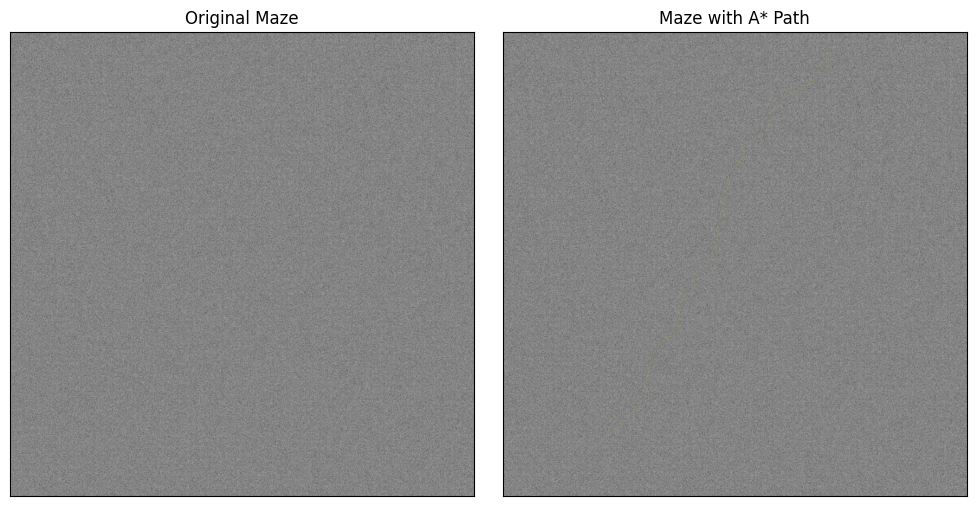

In [90]:
# Do not change, except seed and size for your own exploration

import time
# Run A* and visualize result

# create a maze
# grid = generate_maze(seed=sd, size=sz)

grid = generate_maze(seed=1235, size=1000)
# Locate start and goal positions
for i, row in enumerate(grid):
    for j, val in enumerate(row):
        if val == 'S':
            start = (i, j)
        elif val == 'G':
            goal = (i, j)
      
# path = list of tuples such as [(x0,y0), (x1,y1), ...], (x0,y0) = start, ...
start_time = time.time()
path = astar(grid, start, goal)
end_time = time.time()

print(f"A* took {end_time - start_time:.6f} seconds")

if path:
    plot_maze_side_by_side(grid, "A*", path)
else:
    print("No path found")

BFS took 4.297596 seconds


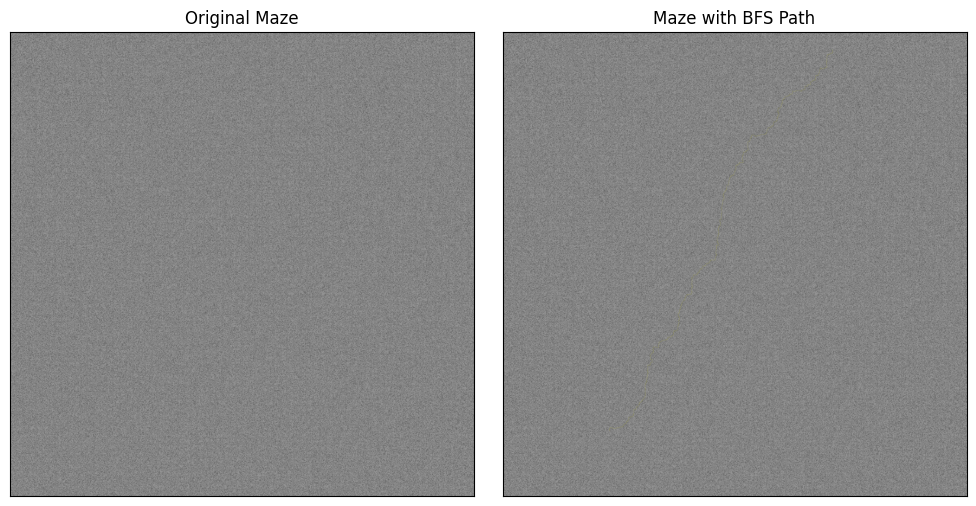

In [91]:
# Do not change, except seed and size for your own exploration
import time
# Run BFS and visualize result

# create a maze
grid = generate_maze(seed=1235, size=1000)
# grid = generate_maze(seed=sd, size=sz)

# Locate start and goal positions
for i, row in enumerate(grid):
    for j, val in enumerate(row):
        if val == 'S':
            start = (i, j)
        elif val == 'G':
            goal = (i, j)
      
# path = list of tuples such as [(x0,y0), (x1,y1), ...], (x0,y0) = start, ...
start_time = time.time()
path = bfs(grid, start, goal)
end_time = time.time()

print(f"BFS took {end_time - start_time:.6f} seconds")

if path:
    plot_maze_side_by_side(grid, "BFS", path)
else:
    print("No path found")

In [ ]:
# This is a comparison of A* and BFS on mazes of increasing size.
# you can change the size but the larger the size the longer it will take

# sizes = list(range(10, 100, 10))
# astarTimes = []
# bfsTimes = []

# for sz in sizes:
#     grid = generate_maze(seed=12345, size=sz)
#     for i, row in enumerate(grid):
#         for j, val in enumerate(row):
#             if val == 'S':
#                 start = (i, j)
#             elif val == 'G':
#                 goal = (i, j)

#     t0 = time.time()
#     result = astar(grid, start, goal)
#     t1 = time.time()
#     astarTimes.append(t1 - t0)
#     result = bfs(grid, start, goal)
#     t1 = time.time()
#     bfsTimes.append(t1 - t0)


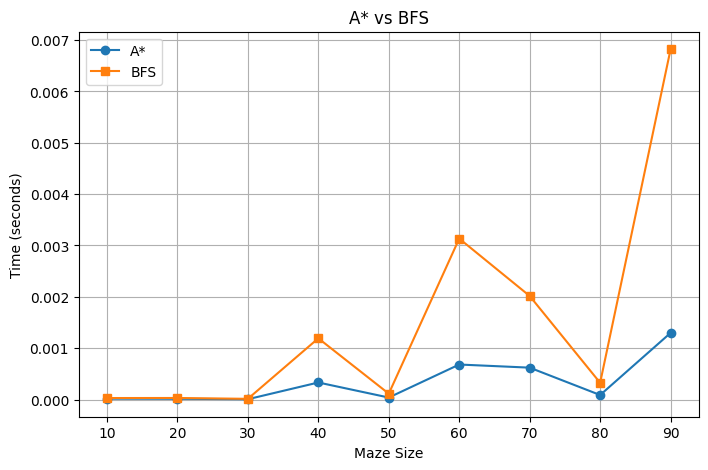

In [ ]:
# this is to see the time difference between A* and BFS

# plt.figure(figsize=(8, 5))
# plt.plot(sizes, astarTimes, label='A*', marker='o')
# plt.plot(sizes, bfsTimes, label='BFS', marker='s')
# plt.xlabel('Maze Size')
# plt.ylabel('Time (seconds)')
# plt.title('A* vs BFS')
# plt.legend()
# plt.grid(True)
# plt.show()

In [94]:
'''
Be at first looked at every path, step by step, and does not really know which way is the best. 
This means it can take longer and use a lot of memory(most likely), specifically if It is a grid. 
is big. A* star is smarter because he uses both actual distance traveled and heuristics to decide which path to try first, 
which makes A* usually faster and more efficient. as shown in the graph above
'''

''' 
Heuristic is like giving A* some sense of direction If the heuristic is good, A* will go straight toward the goal and save us time.
If the heuristic is bad, A* can end up wasting time. So the better the heuristic, the better the performance will be.
'''

' \nHeuristic is like giving A* some sense of direction If the heuristic is good, A* will go straight toward the goal and save us time.\nIf the heuristic is bad, A* can end up wasting time. So the better the heuristic, the better the performance will be.\n'